# **Final Project**
### **IS362 - Kelvin Rodriguez**

### **Proposal**

<p style="text-align: justify;">
My final assignment will look at BMW's sales around the world from 2010 to 2024. I first planned to use a Kaggle dataset for this research, however after looking at the data thoroughly, I saw that it had errors and inconsistencies. I got the official sales numbers straight from BMW's annual reports to make sure my analysis was correct. I looked over and double-checked material from more than fourteen reports. I made a untidy dataset from these sources and put that first version on my GitHub repository. I then cleaned, standardized, and arranged the data as part of the project to make a high-quality dataset that I would utilize for the final project. This topic interests me both personally and academically because I've always had an interest in BMW, which is one of my favorite brands. I want to learn more about how BMW's sales around the world have evolved over time, which locations and models have helped them expand the most, and how performance varies between major markets. I will also use data from the World Bank API to compare BMW's sales trends with GDP growth worldwide. Putting these statistics together will help me see if changes in BMW's sales are related to changes in the economy worldwide. In general, this project is important to me, and I'm sure that using correct, confirmed, and well-cleansed data will let me do a thorough and useful analysis.
</p>

### **Data Acquisition**

In [56]:
!pip install wbgapi
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import wbgapi as wb

# URL of the untidy BMW dataset stored on GitHub.
url = "https://raw.githubusercontent.com/KingScanor/IS362-Final_Project/main/BMW_Group_Annual_Report%20(2010-2024).csv"

# Read the CSV into a DataFrame; 'latin1' avoids character-encoding errors.
df = pd.read_csv(url, encoding='latin1') 

# Preview the first five rows to verify the data loaded correctly.
df.head()

,Model,Variant,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,BMW 1 Series,Convertible,24803.0,19835.0,16286.0,13010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BMW 1 Series,Coup,26191.0,24357.0,20015.0,12417.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BMW 1 Series,Five-door,113030.0,111898.0,176066.0,157163.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BMW 1 Series,Three-door,31980.0,20328.0,14462.0,31021.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BMW 1 Series,none,NaN,NaN,NaN,NaN,190033.0,182158.0,176032.0,201968.0,199980.0,173870.0,164056.0,NaN,NaN,NaN,NaN


In [42]:
# Pull GDP growth (% annual) using indicator 'NY.GDP.MKTP.KD.ZG'
# for the years 2010–2024. numericTimeKeys=True keeps the year as numeric.
df = wb.data.DataFrame('NY.GDP.MKTP.KD.ZG', time=range(2010, 2025), numericTimeKeys=True)

# Preview the first rows to confirm the data loaded correctly.
df.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
economy,,,,,,,,,,,,,,,
ABW,-2.733457,3.369237,-1.040800,6.431483,-1.586575,-0.623626,1.719625,7.048533,2.397086,-2.232442,-26.211820,24.132627,8.517918,4.263719,NaN
AFE,5.207943,4.058923,1.767970,4.317725,4.014351,3.003367,2.195991,2.696238,2.665038,2.200340,-2.859784,4.563568,3.555769,1.891307,2.766804
AFG,14.362441,0.426355,12.752287,5.600745,2.724543,1.451315,2.260314,2.647003,1.189228,3.911603,-2.351101,-20.738839,-6.240172,2.266944,NaN
AFW,7.032025,4.946666,5.140576,6.028023,5.712459,2.928010,0.194177,2.296168,2.904654,3.282163,-0.984117,4.030000,3.974964,3.357987,4.176103
AGO,4.398376,3.472053,8.542107,4.954613,4.822559,0.943572,-2.580050,-0.147213,-1.316362,-0.702273,-5.638215,1.199211,3.044727,1.078100,4.423905


### **Data Preprocessing and Cleanup**

In [57]:
# Identify all columns that represent years
year_cols = [col for col in df.columns if col.isdigit()]

# Convert each year column to numeric:
# - remove commas
# - strip whitespace
# - convert to numbers
# - invalid values become NaN (coerce)
for col in year_cols:
    df[col] = pd.to_numeric(
        df[col].astype(str).str.replace(",", "").str.strip(),
        errors="coerce" 
    )

# Reshape from wide format → long format:
# Each row becomes a Model + Variant + Year + Sales combination.
df_long = df.melt(
    id_vars=["Model", "Variant"],  
    value_vars=year_cols,         
    var_name="year",
    value_name="sales"
)
# Convert the year column from string to integer.
df_long["year"] = df_long["year"].astype(int)

# Aggregate total BMW sales by year.
bmw_sales_by_year = (
    df_long
    .groupby("year", as_index=False)["sales"]
    .sum()
)

# Rename the column for clarity.
bmw_sales_by_year = bmw_sales_by_year.rename(columns={"sales": "unit_sales"})

# Display final year-by-year total sales.
bmw_sales_by_year

,year,unit_sales
0,2010,1224280.0
1,2011,1380384.0
2,2012,1540085.0
3,2013,1655138.0
4,2014,1811719.0
5,2015,1905234.0
6,2016,2003359.0
7,2017,2088283.0
8,2018,2125026.0
9,2019,2185793.0


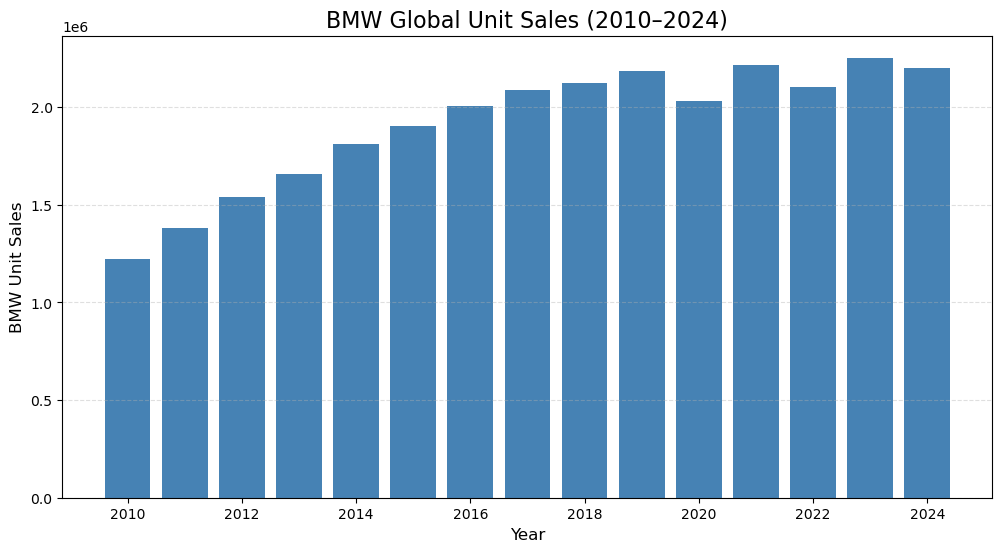

In [44]:
# Set the size of the plot.
plt.figure(figsize=(12,6))

# Create a bar chart showing BMW unit sales by year.
plt.bar(
    bmw_sales_by_year["year"],
    bmw_sales_by_year["unit_sales"],
    color="steelblue"
)
# Add a title to the chart.
plt.title("BMW Global Unit Sales (2010–2024)", fontsize=16)
plt.xlabel("Year", fontsize=12)

# Add a light horizontal grid for readability.
plt.ylabel("BMW Unit Sales", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.4)

# Display the chart.
plt.show()


In [53]:
gdp = wb.data.DataFrame(
    'NY.GDP.MKTP.KD.ZG',     # World Bank indicator for GDP growth (annual %)   
    economy='WLD',           # 'WLD' = world aggregate (global GDP growth) 
    time=range(2010, 2025),  # Years 2010–2024 
    numericTimeKeys=True     # Store years as numeric instead of strings - removed the extra period
)

# Preview the first rows of the global GDP growth DataFrame.
gdp.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
economy,,,,,,,,,,,,,,,
WLD,4.527147,3.347311,2.707281,2.889022,3.148624,3.134515,2.814361,3.456342,3.296091,2.71004,-2.849082,6.419541,3.359911,2.943333,2.863263


In [46]:
# Transpose the GDP DataFrame so years become rows, then reset index.
gdp_tidy = gdp.T.reset_index()

# Rename columns for clarity: 'year' and 'gdp_growth'.
gdp_tidy.columns = ["year", "gdp_growth"]

# Convert the year column to numeric; invalid values become NaN.
gdp_tidy["year"] = pd.to_numeric(gdp_tidy["year"], errors="coerce")

# Remove any rows where 'year' could not be converted to a number.
gdp_tidy = gdp_tidy.dropna(subset=["year"])

# Display the rows of the tidy GDP dataset.
gdp_tidy.head(15)


,year,gdp_growth
0,2010,4.527147
1,2011,3.347311
2,2012,2.707281
3,2013,2.889022
4,2014,3.148624
5,2015,3.134515
6,2016,2.814361
7,2017,3.456342
8,2018,3.296091
9,2019,2.710040


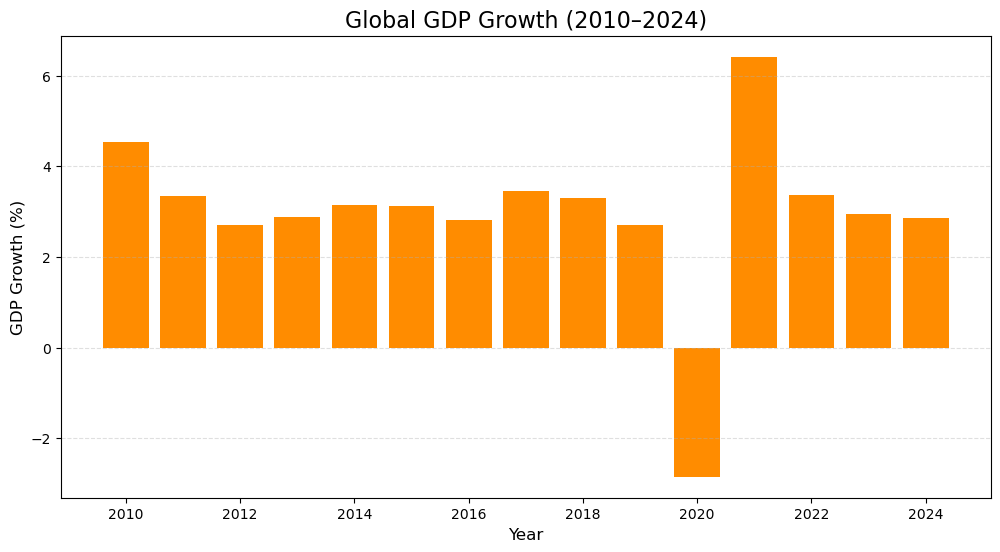

In [47]:
# Set the size of the chart.
plt.figure(figsize=(12,6))

# Create a bar chart showing global GDP growth by year.
plt.bar(
    gdp_tidy["year"],
    gdp_tidy["gdp_growth"],
    color="darkorange"
)

# Add a title to the chart.
plt.title("Global GDP Growth (2010–2024)", fontsize=16)

# Label the axes.
plt.xlabel("Year", fontsize=12)
plt.ylabel("GDP Growth (%)", fontsize=12)

# Add a light horizontal grid for readability.
plt.grid(axis="y", linestyle="--", alpha=0.4)

# Display the chart.
plt.show()


### **Merging BMW Sales Data with GDP Data**

In [48]:
# Ensure both datasets have 'year' as an integer type for proper merging.
bmw_sales_by_year["year"] = bmw_sales_by_year["year"].astype(int)
gdp_tidy["year"] = gdp_tidy["year"].astype(int)

# Merge BMW sales data with global GDP growth data.
# 'inner' keeps only years present in both datasets.
merged = pd.merge(
    bmw_sales_by_year,
    gdp_tidy,
    on="year",
    how="inner"
)

# Display the merged DataFrame.
merged


,year,unit_sales,gdp_growth
0,2010,1224280.0,4.527147
1,2011,1380384.0,3.347311
2,2012,1540085.0,2.707281
3,2013,1655138.0,2.889022
4,2014,1811719.0,3.148624
5,2015,1905234.0,3.134515
6,2016,2003359.0,2.814361
7,2017,2088283.0,3.456342
8,2018,2125026.0,3.296091
9,2019,2185793.0,2.710040


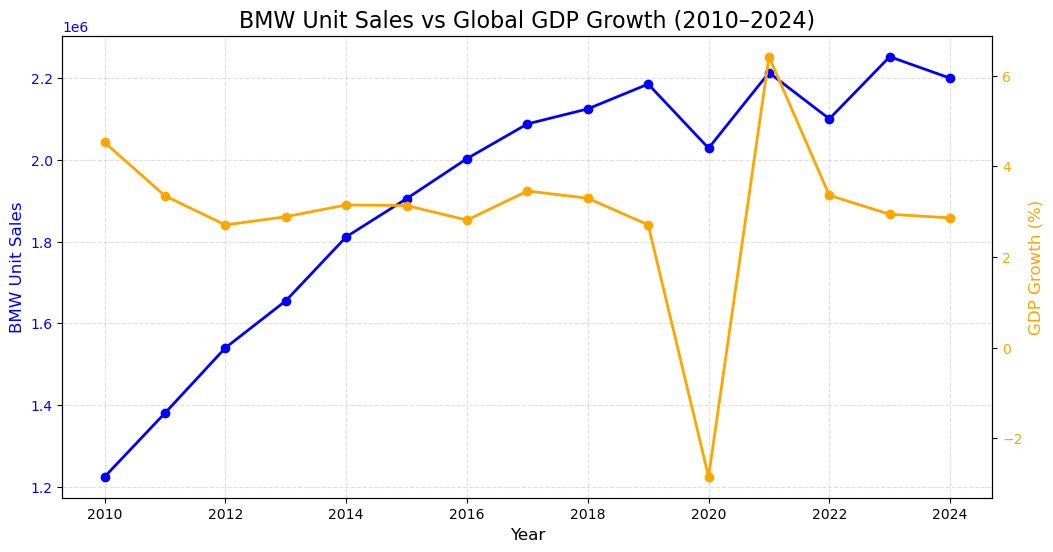

In [49]:
# Create a figure and the first axis (ax1) for BMW unit sales.
fig, ax1 = plt.subplots(figsize=(12,6))

# Plot BMW unit sales on the left y-axis.
ax1.plot(
    merged["year"], 
    merged["unit_sales"], 
    marker="o", 
    color="blue", 
    linewidth=2,
    label="BMW Unit Sales"
)

# Label and format the left axis.
ax1.set_xlabel("Year", fontsize=12)
ax1.set_ylabel("BMW Unit Sales", fontsize=12, color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Create a second axis (ax2) sharing the same x-axis for GDP growth.
ax2 = ax1.twinx()

# Plot GDP growth on the right y-axis.
ax2.plot(
    merged["year"], 
    merged["gdp_growth"], 
    marker="o", 
    color="orange", 
    linewidth=2,
    label="GDP Growth (%)"
)

# Label and format the right axis.
ax2.set_ylabel("GDP Growth (%)", fontsize=12, color="orange")
ax2.tick_params(axis="y", labelcolor="orange")

# Add chart title.
plt.title("BMW Unit Sales vs Global GDP Growth (2010–2024)", fontsize=16)

# Add a light grid for readability.
ax1.grid(True, linestyle="--", alpha=0.4)


In [50]:
# Define features (year, GDP growth) and target variable (BMW unit sales).
X = merged[["year", "gdp_growth"]]
y = merged["unit_sales"]

# Create and train a linear regression model.
model = LinearRegression()
model.fit(X, y)

# Display model parameters to understand how each variable influences sales.
print("Intercept:", model.intercept_)
print("Coefficients [year, gdp_growth]:", model.coef_)

# Future years for forecasting.
future_years = np.array([2025, 2026, 2027, 2028, 2029, 2030])

# Estimated global GDP growth values for each future year. Based on International Monetary Fund website.
future_gdp = np.array([ 3.2, 3.1, 3.2, 3.2, 3.2, 3.1])

# Assemble future predictor values into a DataFrame.
future_X = pd.DataFrame({
    "year": future_years,
    "gdp_growth": future_gdp
})

# Use the trained model to generate sales predictions.
future_predictions = model.predict(future_X)

# Attach predictions to the future years dataset.
future_df = future_X.copy()
future_df["predicted_unit_sales"] = future_predictions

# Round predicted sales to whole units for readability.
future_df["predicted_unit_sales"] = (
    future_df["predicted_unit_sales"].round(0).astype(int)
)

# Display the forecast table.
future_df

Intercept: -131556650.5321985
Coefficients [year, gdp_growth]: [66164.36531153  5863.97069674]


,year,gdp_growth,predicted_unit_sales
0,2025,3.2,2444954
1,2026,3.1,2510532
2,2027,3.2,2577283
3,2028,3.2,2643447
4,2029,3.2,2709611
5,2030,3.1,2775189


### **Data Analysis**

#### Overview
<p style="text-align: justify;">
In this part, I look at BMW's global unit sales from 2010 to 2024, compare those patterns to global GDP growth over the same time period, and apply a simple linear regression model to see how time and GDP growth together might help explain variations in BMW's sales. Then, I use the model to make example predictions for 2025–2030 based on a range of projected GDP growth rates.
</p>

#### BMW Global Sales Trend (2010–2024)
<p style="text-align: justify;">
From 2010 to 2024, BMW's global unit sales demonstrate a consistent long-term increasing trend. This means that the corporation will keep growing, even when sales change from year to year. These changes that happen in the short term might be affected by things outside the company, like the state of the world economy, and things inside the company, like updates to models or changes in product strategy. For example, around 2021 and 2022 several companies reported chip shortages.  Sales have stayed high over the past few years, which means that the brand is still in high demand around the world, even though market conditions have changed. Overall, the data shows that BMW's unit sales are going up over time, with short-term drops that are usual for the market. 
</p>

#### Global GDP Growth Trend (2010–2024)
<p style="text-align: justify;">
From 2010 to 2024, global GDP growth has been unstable, with times of big increase followed by times of slower growth or even decline. The pattern shows that the economy slows down during global crises, but then it picks up again. Overall, the average rise is still moderate, which is good for worldwide consumer demand, especially for high-end cars like BMWs. This context is necessary to appreciate how well BMW is doing in sales.
</p>

#### Relationship Between BMW Sales and Global GDP Growth
<p style="text-align: justify;">
Looking at the connection between BMW sales and global GDP growth gives us a lot of useful information. A dual-axis line chart indicates that higher GDP growth usually corresponds to more BMW unit sales, which suggests that a stronger economy is a good thing. But the connection isn't perfect. There are times when BMW sales stay high even when GDP growth is slowing down. This suggests that brand-specific factors, including new model releases and consumer preferences, appear to play a big role. Also, the steady increase in BMW sales seems to be steadier than the more erratic changes in GDP, which shows that a long-term brand strategy may have a bigger impact on sales than short-term changes in the economy. Overall, while economic conditions play a role, BMW's strategy and product evolution are crucial to understanding its sales performance.
</p>


#### Regression Analysis and Future Sales Forecasting
<p style="text-align: justify;">
When we use year and global GDP growth as predictors in a multiple linear regression analysis of BMW unit sales, the model gives us an intercept of –131,556,650.53, a year coefficient of 66,164.37, and a GDP growth coefficient of 5,863.97. These data show that BMW's sales go up by about 66,000 units per year, which is a sign of solid long-term growth. The GDP growth coefficient demonstrates that a 1% rise in global GDP correlates to an estimated 5,900 more units sold. This illustrates that economic conditions also affect sales, but not as much as time does. The negative intercept only puts the regression plane in the right place in relation to the observed data; it doesn't have a direct meaning in the real world. In general, the model shows that both time and economic conditions are important, but the increasing tendency over time is the most important aspect in BMW's global sales. Using the fitted model, we made sales predictions for 2025–2030 based on the idea that the world's GDP would expand by 3.2% to 3.1% per year. The forecasts say that sales will be about 2.44 million units in 2025 and will rapidly rise to roughly 2.78 million units by 2030. These estimates are based on linear models and don't take into account things like how the market behaves in different regions, competition, changes in regulations, supply chain problems, or big business decisions. Still, the exercise shows how historical data and macroeconomic factors may work together to make simple predictive models and help us think about possible future sales.
</p>

#### Overall Summary
<p style="text-align: justify;">
This analysis looks at BMW's global unit sales from 2010 to 2024 and compares those trends to global GDP growth to see how long-term and short-term factors affect performance. The sales figures reveal an increasing pattern over time, with short-term changes caused by things like problems with the supply chain and changes in the economy as a whole. Even while global GDP growth is more erratic, it usually moves in the same direction as BMW sales. However, this isn't always the case, which shows that brand strategy and product innovation are also crucial. A regression model that uses year and GDP growth as predictors shows that time is the most important factor in sales, with BMW selling about 66,000 more cars per year on average. GDP growth has a lesser but still favorable effect, adding around 5,900 units for every percentage point rise. If global GDP follows the trends that have been predicted, simple projections for BMW sales from 2025 to 2030 show that they will keep going up. Even if these predictions don't take into account all the market elements, they show how historical data and economic indicators can help make simple forecasts.
</p>


### References


-	Use this website to get the forecast for the next 5 years’ GDP.

International Monetary Fund. (2025, October 14). World Economic Outlook: Global Economy in Flux, Prospects Remain Dim. Retrieved from https://www.imf.org/en/publications/weo/issues/2025/10/14/world-economic-outlook-october-2025 (imf.org)

-	Use this to learn and research about Linear regression. I implemented this on my project. 

FormulatedBy. (2025, August 1). Linear regression basics guide - part 1. DSS Blog. https://roundtable.datascience.salon/linear-regression-basics-guide-part-1

LinearRegression. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

-	Use this website to get 14 yearly reports. 

The official press portal of the BMW Group in 19 languages. We provide you with the latest press releases of the BMW Group free of charge and at first hand. The material comprises text, photos, audio, video and TV footage. (n.d.-a). BMW Group PressClub. https://www.press.bmwgroup.com/global/

-	Use this website to rearsh about Pandas DataFrames and matplotlib.pyplot

W3Schools.com. (n.d.). https://www.w3schools.com/
